## Implementing Linear Models

Importing necessary libraries and loading the dataset using sklearn.datasets.

In [1]:
# importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True).frame

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Exploratory data analysis:

In [2]:
california_housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [3]:
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We see that we dont have null values in our data, while every column has numerical values.


In [4]:
california_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


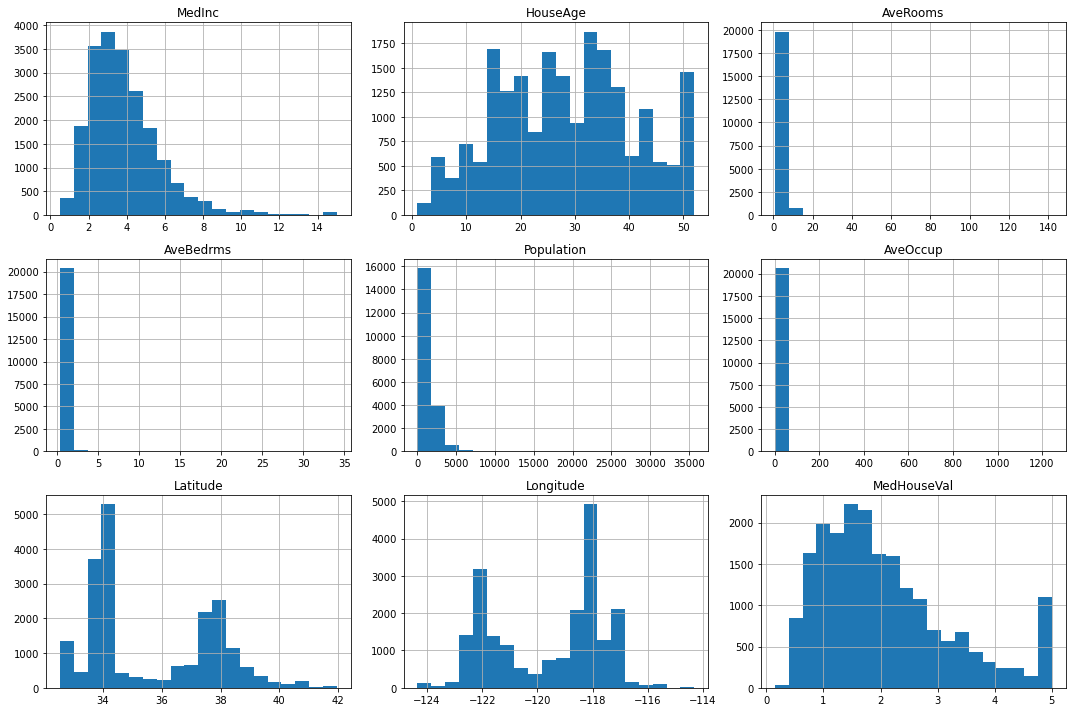

In [5]:
import matplotlib.pyplot as plt
california_housing.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

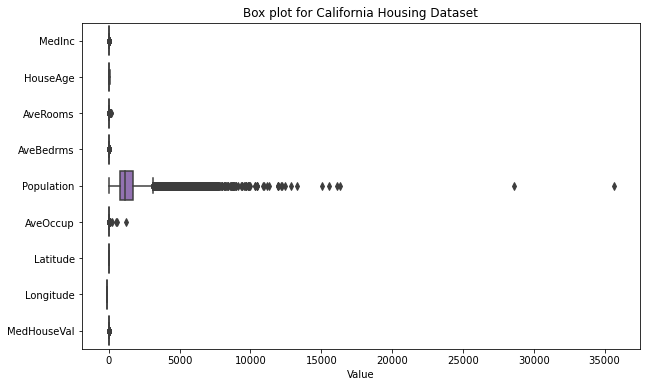

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=california_housing, orient="h")
plt.title("Box plot for California Housing Dataset")
plt.xlabel("Value")
plt.show()

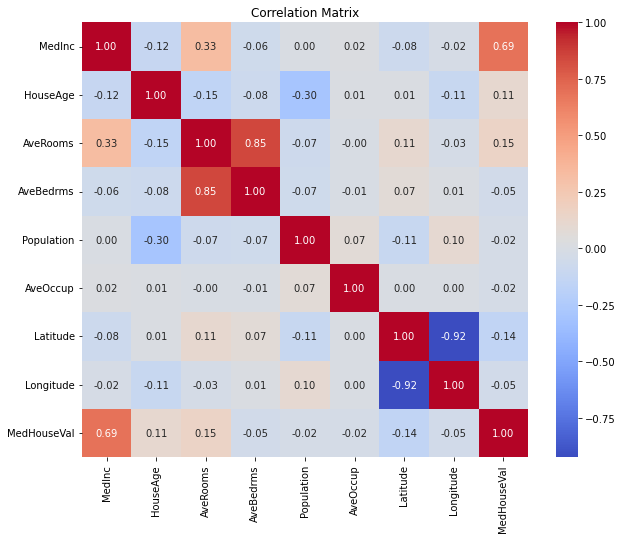

In [7]:
correlation_matrix = california_housing.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Yet, the population feature has outliers it is not much correlated with the target variable. We choose the features that are highly correlated with the target variable( MedHouseVal). 

The features that are highly correlated with the target varibale are 'MedInc', 'AveRooms', 'HouseAge'.

Let us implement simple linear regression using 'MedInc' feature.

### SIMPLE LINEAR REGRESSION

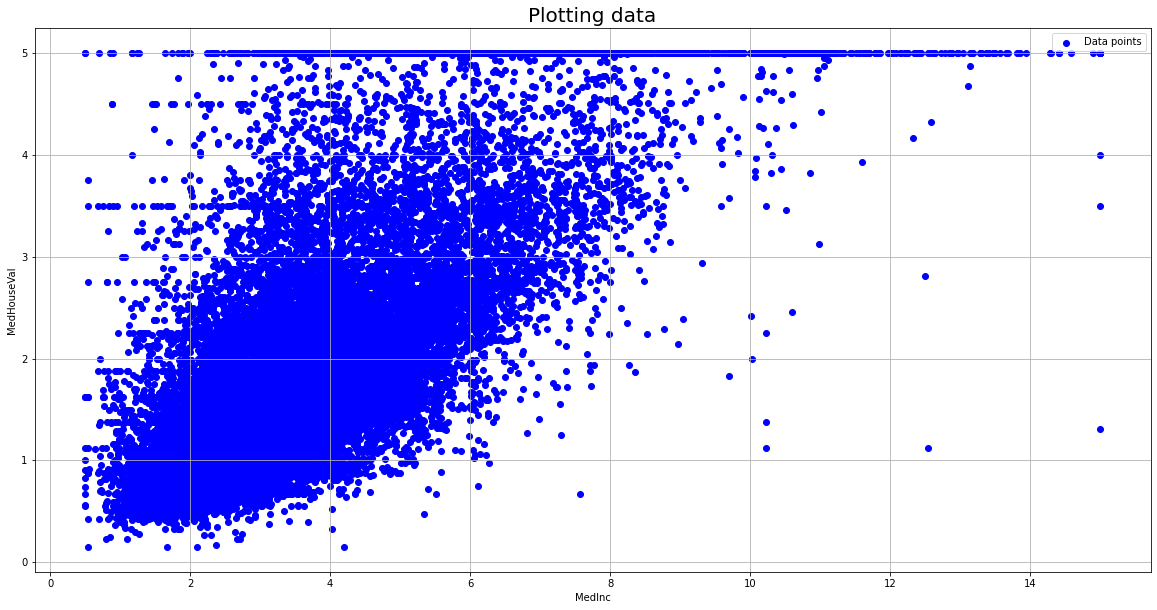

In [26]:

# y = mx + c

plt.figure(figsize=(20, 10))
plt.scatter(california_housing['MedInc'], california_housing['MedHouseVal'], color='blue', label='Data points')
plt.title('Scatter Plot')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()
plt.grid(True)
plt.title("Plotting data", fontsize = 20)
plt.show()


The above scatter plot is a relationship between the features 'MedInc' and 'MedHouseVal'. We see a positive correlation where, as the median income increases, the median house value also increases.

In [27]:
X = california_housing['MedInc'].values
Y =  california_housing['MedHouseVal'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(16512,)
(16512,)


In [28]:
X_train

array([3.2596, 3.8125, 4.1563, ..., 2.9344, 5.7192, 2.5755])

In [29]:

X_train = np.c_[X_train,np.ones(len(X_train))]
X_train = X_train.T
print(X_train)


[[3.2596 3.8125 4.1563 ... 2.9344 5.7192 2.5755]
 [1.     1.     1.     ... 1.     1.     1.    ]]


In [30]:
def gradient_descent( X_train, y_train, learning_rate, iterations):
    actual = y_train
    costs = []
    weights = np.zeros(2,)
    m = len(actual)
    for i in range(iterations):
        predictions = np.matmul(weights.T, X_train)
        errors = predictions - actual
        squared_errors = errors * errors
        RSS = np.sum(squared_errors)
        costs.append(RSS)
        # using the formula for gradient descent
        gradients = (1/m)*np.matmul(X_train, errors)
        weights = weights - (learning_rate * gradients)
    return weights, costs

The above algorithm calculates the weights for the given iterations using the gradient descent formula.
We proceed by choosing the learning rate 0.01 and 20 iterations.

In [37]:
# defining a learning rate, number of iterations
learning_rate = 0.01
iterations = 20
# Here I am calling the function gradient descent to find the optimal values of slope and intercept
weights, costs = gradient_descent(X_train, y_train, learning_rate, iterations)

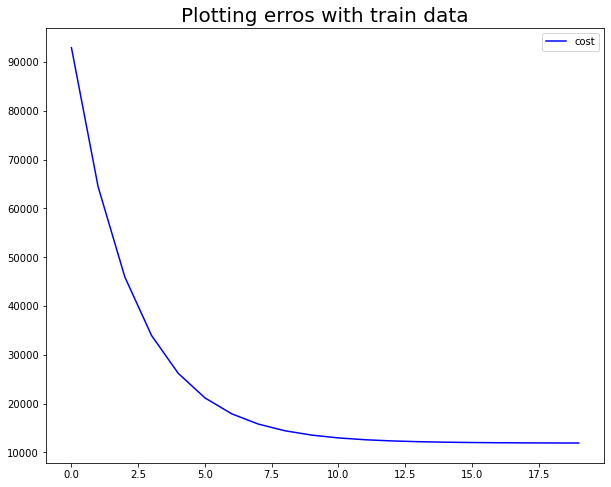

In [38]:
plt.figure(figsize=(10,8))
plt.plot(np.arange (20), costs, label='cost', color = 'blue')
plt.title("Plotting erros with train data", fontsize = 20)
plt.legend(loc='upper right')

We see that the cost( the squared errors) tend to decrease by increasing the number of iterations. We take those minimum values of the weights where the cost is minumim.

In [39]:
# result of coefficients
print(weights)

[0.48196545 0.11413142]


In [40]:
best_fit_line = np.matmul(weights.T,X_train)
best_fit_line = np.c_[best_fit_line,np.ones(len(best_fit_line))]
print(best_fit_line.shape)

(16512, 2)


In [41]:
y_train = np.c_[y_train,np.ones(len(y_train))]
y_train = y_train.T
print(X_train.shape, y_train.shape)

(2, 16512) (2, 16512)


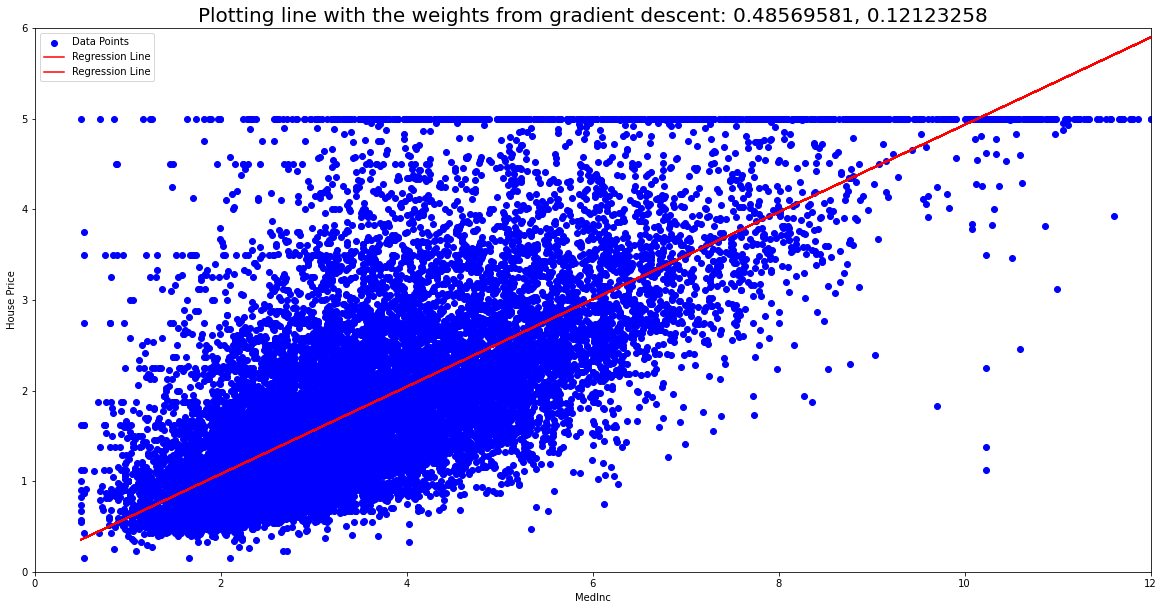

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train , color='blue', label='Data Points')
plt.plot(X_train.T,best_fit_line, color='red', label='Regression Line')
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.xlim(0, 12) 
plt.ylim(0, 6)
plt.title("Plotting line with the weights from gradient descent: 0.48569581, 0.12123258", fontsize = 20)
plt.show()



The above line is the best fit line passing through all data points.

In [43]:
weights

array([0.48196545, 0.11413142])

In [44]:
X_test = np.c_[X_test,np.ones(len(X_test))]
X_test = X_test.T
print(X_test)

[[1.6812 2.5313 3.4801 ... 9.2298 2.785  3.5521]
 [1.     1.     1.     ... 1.     1.     1.    ]]


In [46]:
# predicting using test line

test_predictions = np.matmul(weights.T, X_test)
print(test_predictions)

performance=pd.DataFrame ({'PREDICTIONS':test_predictions,'ACTUALS':y_test})

performance['Squared_Errors'] = (performance['PREDICTIONS'] - performance['ACTUALS']) **2

performance


[0.92441174 1.33413057 1.7914194  ... 4.56257616 1.45640521 1.82612091]


,PREDICTIONS,ACTUALS,Squared_Errors
0,0.924412,0.47700,0.200177
1,1.334131,0.45800,0.767605
2,1.791419,5.00001,10.295054
3,2.879456,2.18600,0.480882
4,1.909453,2.78000,0.757853
...,...,...,...
4123,2.333582,2.63300,0.089651
4124,1.428258,2.66800,1.536959
4125,4.562576,5.00001,0.191348
4126,1.456405,0.72300,0.537883


In [47]:
mean_squared_error = np.mean(performance['Squared_Errors'])
mean_squared_error

0.7351062188767549

In [48]:
Root_mean_square_error = np.sqrt(mean_squared_error)
Root_mean_square_error

0.8573833558430878

In [49]:
Residual_sum_of_squares = np.sum(performance['Squared_Errors'])
Residual_sum_of_squares

3034.5184715232426

## Multiple Linear Regression

Taking the highly correlated features for the model.

In [50]:
# Multiple linear regression
# including multiple features to compute the house price


X1 = california_housing['MedInc'].values
X2 = california_housing['HouseAge'].values
X3 = california_housing['AveRooms'].values
Y =  california_housing['MedHouseVal'].values

In [51]:
X_m = matrix = np.array([X1, X2, X3]).T

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, Y, test_size=0.2, random_state=42)

print(X_m_train.shape)


(16512, 3)


In [52]:
X_m_train = np.c_[X_m_train,np.ones(len(X_m_train))].T
print(X_m_train)

[[ 3.2596      3.8125      4.1563     ...  2.9344      5.7192
   2.5755    ]
 [33.         49.          4.         ... 36.         15.
  52.        ]
 [ 5.0176565   4.47354497  5.64583333 ...  3.98671727  6.39534884
   3.40257649]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]


We add a column of ones to balance it with the weight terms. As we will have 4 weights for three features
such as w0 + x1w1 + x2w2 + x3w3 = predictions.

In [53]:
print(X_m_train.shape)
print(y_m_train.shape)

(4, 16512)
(16512,)


In [54]:
def hypothesis(weights_m, X_m_train):
    predictions = np.matmul(weights_m.T, X_m_train)
    return predictions

In [55]:
def computing_cost(predictions, actual):
    errors = predictions - actual
    squared_errors = errors * errors
    RSS = np.sum(squared_errors)
    return RSS

In [56]:
def gradient_descent_algo( X_m_train, y_m_train, learning_rate, iterations):
    actual = y_m_train
    costs_m = []
    weights_m = np.zeros(4,)
    m = len(actual)
    for i in range(iterations):
        predictions = hypothesis(weights_m, X_m_train)
        errors = predictions - actual
        costs_m.append(computing_cost(predictions, actual))
        # using the formula for gradient descent
        gradients = (1/m)*np.matmul(X_m_train, errors)
        weights_m = weights_m - (learning_rate * gradients)
    return weights_m, costs_m

In [57]:
# defining a learning rate, number of iterations
learning_rate = 0.0003
iterations = 30
# Here I am calling the function gradient descent to find the optimal values of slope and intercept
weights_m, costs_m = gradient_descent_algo(X_m_train, y_m_train, learning_rate, iterations)

In [58]:
X_m_train.shape

(4, 16512)

In [59]:
y_m_train.shape

(16512,)

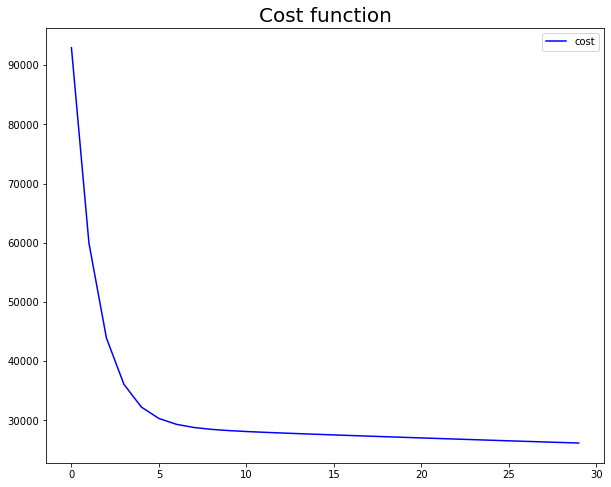

In [60]:
plt.figure(figsize=(10,8))
plt.plot(np.arange (30), costs_m, label='cost', color = 'blue')
plt.title('Cost function', fontsize = 20)
plt.legend(loc='upper right')

In [19]:
# Hence the weights from the model are:

print(weights_m)

[0.02967101 0.05525205 0.02668028 0.00397747]


In [61]:
X_m_test = np.c_[X_m_test,np.ones(len(X_m_test))]
X_m_test = X_m_test.T
print(X_m_test)

[[ 1.6812      2.5313      3.4801     ...  9.2298      2.785
   3.5521    ]
 [25.         30.         52.         ... 25.         36.
  17.        ]
 [ 4.19220056  5.03938356  3.97715472 ...  7.23767606  5.28902954
   3.98883929]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]


In [62]:
print(X_m_test.shape)
print(weights_m.shape)

(4, 4128)
(4,)


In [63]:
test_m_predictions = hypothesis(weights_m, X_m_test)
print(test_m_predictions)

performance_m=pd.DataFrame ({'PREDICTIONS':test_m_predictions,'ACTUALS':y_m_test})

performance_m['Squared_Errors'] = (performance_m['PREDICTIONS'] - performance_m['ACTUALS']) **2

performance_m

[1.5470108  1.87109748 3.08645398 ... 1.85223952 2.21679796 1.15508012]


,PREDICTIONS,ACTUALS,Squared_Errors
0,1.547011,0.47700,1.144923
1,1.871097,0.45800,1.996844
2,3.086454,5.00001,3.661697
3,1.277950,2.18600,0.824554
4,2.139626,2.78000,0.410078
...,...,...,...
4123,1.211466,2.63300,2.020758
4124,1.795537,2.66800,0.761191
4125,1.852240,5.00001,9.908459
4126,2.216798,0.72300,2.231432


In [64]:
mean_squared_error = np.mean(performance_m['Squared_Errors'])
mean_squared_error

1.531063822876043

In [65]:
Root_mean_square_error = np.sqrt(mean_squared_error)
Root_mean_square_error

1.2373616378715007

In [66]:
Residual_sum_of_squares = np.sum(performance_m['Squared_Errors'])
Residual_sum_of_squares

6320.231460832294

## Locally Weighted Linear Regression

In [67]:
# LOCALLY WEIGHTED REGRESSION

X_l = california_housing['MedInc'].values
Y_l = california_housing['MedHouseVal'].values
print(X_l)

X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_l, Y_l, test_size = 0.2, random_state= 80)

X_l_train = np.c_[X_l_train,np.ones(len(X_l_train))]
X_l_train = X_l_train.T
print(X_l_train)


[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]
[[6.822  4.7159 3.8427 ... 2.9375 4.7109 5.0477]
 [1.     1.     1.     ... 1.     1.     1.    ]]


In [72]:

# implementing locally weighted

def gaussian_kernel(d, tau):
    g_k = np.exp(-0.5 * (d / tau)**2)
    
    return g_k

def LWLR(preds, X_train, y_train, kernel, tau):
    s = X_train.shape[0]
    weight = np.zeros((s,))
    
    for i in range(s):
        distance_squared = np.sum((X_train[i] - preds) ** 2)
        weight[i] = gaussian_kernel(np.sqrt(distance_squared), tau)
    
    W = np.diag(weight)
    
    XW = X_train.T.dot(W).dot(X_train)
    theta = np.linalg.inv(XW).dot(X_train.T).dot(W).dot(y_train)
    
    predictions = np.dot(preds, theta)
    
    return predictions

np.random.seed(0)
X_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X_train + np.random.randn(100, 1)


weights = {0.1 : np.array([1.5]), 0.2 : np.array([2.6]), 0.3 : np.array([3.2])}



for tau, pred_y in weights.items():
    house_price = LWLR(pred_y, X_train, y_train, gaussian_kernel, tau)
    print(f"House price value for {pred_y} with tau = {tau} is {house_price}")

House price value for [1.5] with tau = 0.1 is [8.62680126]
House price value for [2.6] with tau = 0.2 is [13.08467002]
House price value for [3.2] with tau = 0.3 is [16.14068892]
